<a href="https://colab.research.google.com/github/andres00157/Inteligencia_artificial/blob/main/Inteligencia_artificial/Taller_coheficiente_Correlacion/Coheficiente_correlacion_andres_barreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importando librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:

# Funcion que determina el costo, recibe los parametros, los valores x, y Y
def costo(parametos,x,y):
    J = (sum((np.transpose(parametos) @ x-y)**2))/(2*x.shape[1])
    return J

# Realiza el gradiente.
def gradiente(teta,x,y):
    grad = ((np.transpose(teta) @ x-y) @ np.transpose(x))/x.shape[1]
    return grad

# Realiza el calculo de la recta
def calculo_recta(x,y,theta_inicial,alpha,error_min,max_iteracion):
    parametros = theta_inicial
    for i in range(max_iteracion):
        parametros = parametros- alpha * gradiente(parametros,x,y)
        J = costo(parametros,x,y)
        if(J<error_min):
            break
    return parametros, J

# Calcula la recta deacuerdo con los parametros
def calc_Recta(tetha,x):
    y_est = np.transpose(x) @ tetha
    return y_est

# Realiza el calculo del R2, deacuerdo con las caracteristicas, etiquetas
# y los parametros
def R_cuadrado(x,y,tetha):
    y_est = calc_Recta(tetha,x)
    y_prom = sum(y)/y.shape[0]
    R_cua= 1-(sum((y-y_est)**2))/(sum((y-y_prom)**2))
    return R_cua

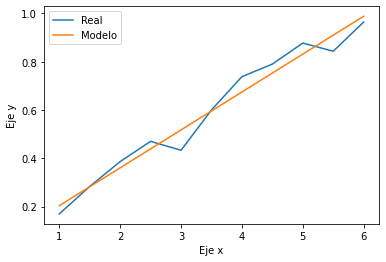

Parametros hallados: [0.0467188 0.1569703]
Coheficiente de correlacion: 0.9678913144832825


In [8]:
# Creando variable x
x = np.arange(1,6.5,0.5)
x = np.array([np.ones_like(x),x])
# Creando variable y
y = np.array([0.169610271922408, 0.283395812542308, 0.386358737510785, 0.470227872390909, 0.433281293764675, 0.600267648212653, 0.738338980436742, 0.790315020494445, 0.877464268422459, 0.84356446225183, 0.96443891694455])

parametros_min, J_min = calculo_recta(x,y,np.array([1,1]),0.032,0.000000001,10000)
r = R_cuadrado(x,y,parametros_min)

plt.plot(x[1,:],y)
plt.plot(x[1,:],calc_Recta(parametros_min,x))
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.legend(["Real","Modelo"])
plt.show()

print("Parametros hallados:",parametros_min)
print("Coheficiente de correlacion:",r)